**Лабораторная работа. Регрессионный анализ данных методами машинного обучения**

https://www.kaggle.com/datasets/simonezappatini/body-fat-extended-dataset

**Задание 1
. Используйте регрессионный анализ для прогнозирования заболевания сахарным диабетом**

In [1]:
import matplotlib.pyplot as plt # импортируем matplotlib для графиков
import numpy as np # импортируем numpy для числовых операций
from sklearn import datasets, linear_model # импортируем модуль datasets из sklearn для загрузки стандартных наборов данных
from sklearn.metrics import mean_squared_error, r2_score # импортируем модуль linear_model из sklearn для доступа к моделям линейной регрессии
import pandas as pd # импортируем pandas для работы с таблицами

In [ ]:
diabetes_data = datasets.load_diabetes() # загружаем встроенный набор данных "diabetes" из модуля datasets

In [ ]:
print(diabetes_data.keys,diabetes_data.data.shape) # вывод информации о ключах объекта

<built-in method keys of Bunch object at 0x7aa602990e60> (442, 10)


In [ ]:
print(diabetes_data.feature_names) # вывод названия признаков

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# Создание DataFrame
di = pd.DataFrame(diabetes_data.data) # создаём таблицу из матрицы признаков
di.columns = diabetes_data.feature_names # присваиваем столбцам имена признаков
di['target'] = diabetes_data.target # добавляем колонку с целевой переменной для обучения

In [ ]:
# Подготовка признаков и обучение модели
x=di.drop('target',axis=1) # удаляем столбец 'target'

In [ ]:
rm = linear_model.LinearRegression() # создаём объект линейной регрессии
rm.fit(x,di.target) # обучение модели

LinearRegression()

In [ ]:
print(rm.intercept_) # вывод свободного члена модели регресии

152.13348416289597


In [ ]:
print(rm.coef_) # вывод коэффициентов регрессии

[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


In [ ]:
print(rm.predict(x)[:10]) # вывод первых 10 предсказанных значений

[206.11667725  68.07103297 176.88279035 166.91445843 128.46225834
 106.35191443  73.89134662 118.85423042 158.80889721 213.58462442]


Text(0, 0.5, 'predicted data')

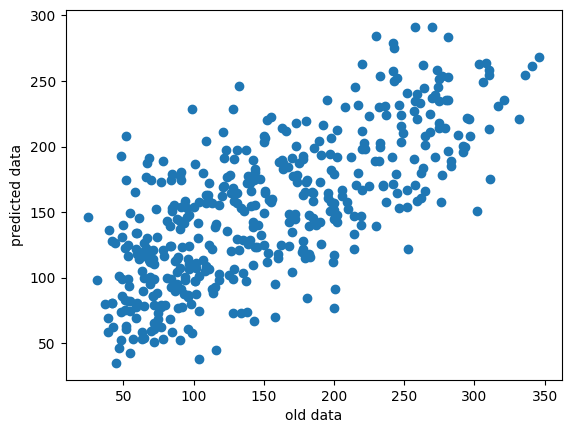

In [ ]:
plt.scatter(di.target,rm.predict(x)) # построение диаграммы разброса
plt.xlabel('old data') # подпись оси х графика
plt.ylabel('predicted data') # подпись оси у графика

**Задание 2. Постройте уравнение регрессии, вычислите прогнозные значения,
используя тестовые данные.**

In [2]:
import sys # доступ к параметрам и функциям интерпретатора Python
import seaborn as sns # библиотека для визуализации статистических данных
from google.colab import drive # подключение Google Drive

drive.mount('/content/gdrive') #подключение гугл диска

Mounted at /content/gdrive


In [3]:
import warnings
warnings.filterwarnings('ignore') # отключаем вывод предупреждений (warnings) в консоль, чтобы вывод был чище

dframe = pd.read_csv("/content/gdrive/My Drive/КАФЕДРА/МАШИННОЕ/BodyFatExtended.csv") #загрузка файла
# Удаляем не нужные для работы столбцы
dframe = dframe.drop(dframe.columns[2], axis=1) # Original
dframe = dframe.drop(dframe.columns[1], axis=1) # Sex

dframe.head(5) # вывод 5 первых строк датафрейма


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
dframe['Age'] = dframe['Age'].astype(float)

In [5]:
dframe.info() #вывод сводной информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  436 non-null    float64
 1   Age      436 non-null    float64
 2   Weight   436 non-null    float64
 3   Height   436 non-null    float64
 4   Neck     436 non-null    float64
 5   Chest    436 non-null    float64
 6   Abdomen  436 non-null    float64
 7   Hip      436 non-null    float64
 8   Thigh    436 non-null    float64
 9   Knee     436 non-null    float64
 10  Ankle    436 non-null    float64
 11  Biceps   436 non-null    float64
 12  Forearm  436 non-null    float64
 13  Wrist    436 non-null    float64
dtypes: float64(14)
memory usage: 47.8 KB


In [6]:
dframe.describe() #получение статистического описания датафрейма

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,34.545872,72.282203,1.734048,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908
std,7.502125,15.500099,15.464366,0.098359,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291
min,0.000000,1.000000,42.184800,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,15.022500,21.000000,59.875200,1.668780,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000
50%,20.500000,28.500000,70.815800,1.730000,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000
75%,25.410000,46.000000,81.560000,1.800000,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000
max,47.500000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
dframe.replace("?", np.nan, inplace=True) # заменяем "?" на NaN

for col in dframe.columns: # заполняем пропуски
    if dframe[col].dtype == "object":
        dframe[col].fillna(dframe[col].mode()[0], inplace=True) # для строковых (категориальных) значений заменяем на моду
    else:
        dframe[col].fillna(dframe[col].mean(), inplace=True) # для числовых — на среднее

In [8]:
dframe.iloc[:,0:].corr() #вычисление матрицы корреляции

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
BodyFat,1.000000,0.015808,0.345822,-0.150693,0.121790,0.310410,0.357465,0.588482,0.331031,0.367168,0.182745,0.258221,0.106236,0.089182
Age,0.015808,1.000000,0.519842,0.372990,0.685648,0.622099,0.686124,0.141997,0.416740,0.406727,0.334627,0.534853,0.605983,0.687237
Weight,0.345822,0.519842,1.000000,0.589737,0.889274,0.908069,0.932298,0.805107,0.911007,0.857480,0.734550,0.887622,0.835529,0.852882
Height,-0.150693,0.372990,0.589737,1.000000,0.591184,0.493097,0.500683,0.294508,0.456867,0.486657,0.461879,0.500889,0.567114,0.587256
Neck,0.121790,0.685648,0.889274,0.591184,1.000000,0.878798,0.905187,0.550018,0.814819,0.718648,0.646243,0.864028,0.881829,0.899204
Chest,0.310410,0.622099,0.908069,0.493097,0.878798,1.000000,0.923944,0.652564,0.816111,0.730508,0.618492,0.840143,0.816486,0.818179
Abdomen,0.357465,0.686124,0.932298,0.500683,0.905187,0.923944,1.000000,0.676211,0.852196,0.772372,0.640534,0.859768,0.834764,0.856029
Hip,0.588482,0.141997,0.805107,0.294508,0.550018,0.652564,0.676211,1.000000,0.782589,0.772544,0.603796,0.653867,0.517417,0.533924
Thigh,0.331031,0.416740,0.911007,0.456867,0.814819,0.816111,0.852196,0.782589,1.000000,0.824800,0.697138,0.859831,0.795441,0.785533
Knee,0.367168,0.406727,0.857480,0.486657,0.718648,0.730508,0.772372,0.772544,0.824800,1.000000,0.711768,0.754541,0.712765,0.738605


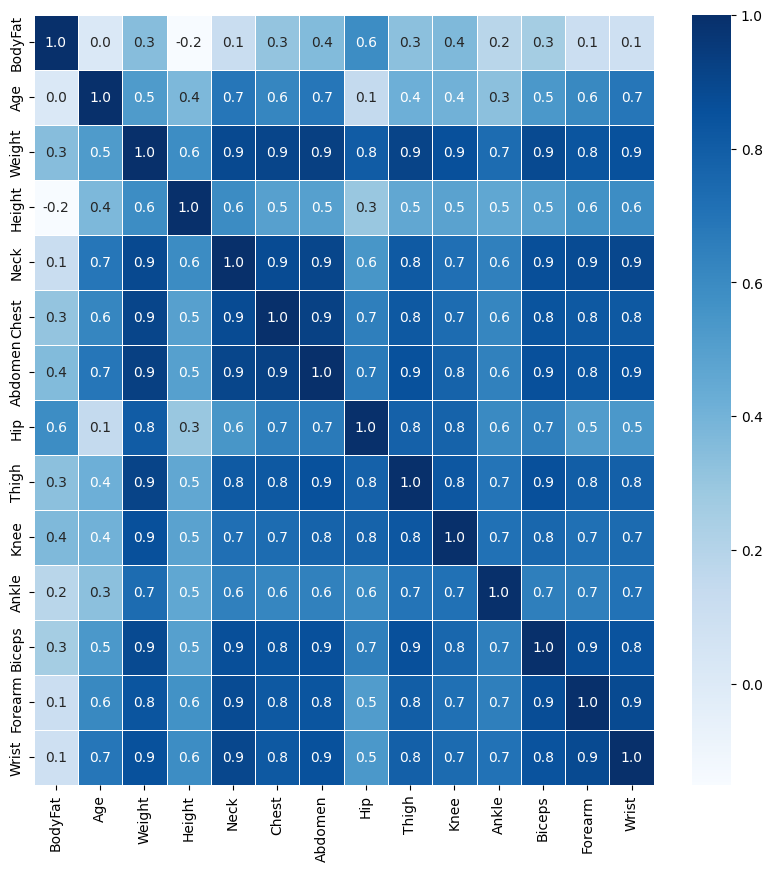

In [ ]:
f, axx = plt.subplots(figsize=(10,10)) #создание осей и графика
sns.heatmap(dframe.iloc[:,0:].corr(), linewidths=0.5, cmap="Blues", annot=True,fmt=".1f", ax=axx) # строим тепловую карту корреляционной матрицы
plt.show() #отображение графика

In [9]:
df= dframe.drop_duplicates(subset=["Weight"]) #Создание нового датафрейма, исключая дубликаты по столбцу "charges"

In [10]:
df.info() #вывод сводной информации

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 429
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  261 non-null    float64
 1   Age      261 non-null    float64
 2   Weight   261 non-null    float64
 3   Height   261 non-null    float64
 4   Neck     261 non-null    float64
 5   Chest    261 non-null    float64
 6   Abdomen  261 non-null    float64
 7   Hip      261 non-null    float64
 8   Thigh    261 non-null    float64
 9   Knee     261 non-null    float64
 10  Ankle    261 non-null    float64
 11  Biceps   261 non-null    float64
 12  Forearm  261 non-null    float64
 13  Wrist    261 non-null    float64
dtypes: float64(14)
memory usage: 30.6 KB


In [11]:
df.columns #Возвращает список названий столбцов в датафрейме

Index(['BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

In [12]:
mean_Weight = df["Weight"].mean() # находим среднее значение
print(mean_Weight)

76.57611494252875


In [13]:
df["Admit Level"] = ["Low" if each < 76.57611494252875 else "High" for each in df["Weight"]] # создаем новый столбец "Admit Level" в датафрейме
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Admit Level
0,12.3,23.0,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Low
1,6.1,22.0,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,High
2,25.3,22.0,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Low
3,10.4,26.0,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,High
4,28.7,24.0,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,High


In [14]:
df.info() #вывод сводной информации

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 429
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BodyFat      261 non-null    float64
 1   Age          261 non-null    float64
 2   Weight       261 non-null    float64
 3   Height       261 non-null    float64
 4   Neck         261 non-null    float64
 5   Chest        261 non-null    float64
 6   Abdomen      261 non-null    float64
 7   Hip          261 non-null    float64
 8   Thigh        261 non-null    float64
 9   Knee         261 non-null    float64
 10  Ankle        261 non-null    float64
 11  Biceps       261 non-null    float64
 12  Forearm      261 non-null    float64
 13  Wrist        261 non-null    float64
 14  Admit Level  261 non-null    object 
dtypes: float64(14), object(1)
memory usage: 32.6+ KB


In [15]:
import plotly.graph_objs as go # работа с графиками

trace1 = go.Scatter( # создаем первый набор данных для графика, представляющий информацию о "age"
                        x = df["Weight"], # устанавливает значения по оси X
                        y = df.Neck, # устанавливает значения по оси У
                        mode = "markers", # указывает, что данные будут отображаться в виде маркеров
                        name = "Neck", # название, которое будет отображаться в легенде графика
                        marker = dict(color="rgba(255, 100, 128, 0.8)"), # задает цвет маркеров с прозрачностью
                        text = df["Admit Level"] # привязывает текст, отображаемый при наведении на маркеры, к колонке "Admit Level"
                        )
trace2 = go.Scatter( # создаем второй набор данных для графика, представляющий информацию о "sex"
                        x = df["Weight"],
                        y = df["Chest"],
                        mode = "markers",
                        name = "Chest",
                        marker = dict(color="rgba(80, 80, 80, 0.8)"),
                        text = df["Admit Level"]
                        )
trace3 = go.Scatter( # создаем третий набор данных для графика, представляющий информацию о "bmi"
                        x = df["Weight"],
                        y = df["Abdomen"],
                        mode = "markers",
                        name = "Abdomen",
                        marker = dict(color="rgba(0, 128, 255, 0.8)"),
                        text = df["Admit Level"]
                        )
data = [trace1, trace2, trace3] # объединяем все три набора данных в список data
layout = dict(title="Neck, Chest and Abdomen v Weight", # определяем макет графика
             xaxis=dict(title="Weight", ticklen=5, zeroline=False), # настраиваем ось X с заголовком и параметрами делений
             yaxis=dict(title="Values", ticklen=5, zeroline=False) # настраиваем ось Y с заголовком и параметрами делений
             )
fig = dict(data=data, layout=layout) # создаем финальный объект, который содержит данные и макет, готовый для отображения

In [19]:
from sklearn.linear_model import LinearRegression # выполнение линейной регрессии

linear_reg = LinearRegression() # модель линейной регрессии

In [20]:
print(df.Neck.values.shape) # выводим форму массива значений из столбца age
print(df["Weight"].values.shape) # выводим форму массива значений из столбца charges

x = df.Neck.values.reshape(-1,1) # преобразуем одномерный массив значений из столбца age в двумерный массив с одной колонкой
y = df["Weight"].values.reshape(-1,1) # преобразуем одномерный массив значений из столбца charges в двумерный массив с одной колонкой.
print("After resphape:\nX:", x.shape) # выводим размерность массива x после изменения его формы
print("Y:", y.shape) # выводим размерность массива y после изменения его формы

(261,)
(261,)
After resphape:
X: (261, 1)
Y: (261, 1)


In [21]:
linear_reg.fit(x,y) # выполняет обучение линейной регрессии на данных x и y

LinearRegression()

In [22]:
b0 = linear_reg.intercept_ # извлечение свободного члена из модели линейной регрессии
print("b0:", b0) # вывод значения b0

b1 = linear_reg.coef_ #извлечение коэффициента наклона из модели
print("b1:", b1) # вывод значения коэффициента b1

print("Linear Regression Formula:", "y = {0} + {1}*x".format(b0,b1)) #вывод полной формулы линейной регрессии в формате y = b0 + b1*x

b0: [-65.1468895]
b1: [[3.8831889]]
Linear Regression Formula: y = [-65.1468895] + [[3.8831889]]*x


In [23]:
x[0:5] # Прогнозирование

array([[36.2],
       [38.5],
       [34. ],
       [37.4],
       [34.4]])

In [24]:
df[df.Neck == 36.2].loc[:,"Weight"] # фильтруем строки, где Neck равен строке "36.2" и выбираем только столбец Weight


,Weight
0,69.97
26,59.65


In [25]:
linear_reg.predict([[64]]) # делаем предсказание с обученной моделью

array([[183.37719992]])

In [26]:
print(min(x), max(x)) # вывод минимальных значений х и у

[28.] [51.2]


In [27]:
print("x[:5] =", x[:5])
print("y[:5] =", y[:5])

x[:5] = [[36.2]
 [38.5]
 [34. ]
 [37.4]
 [34.4]]
y[:5] = [[69.97]
 [78.59]
 [69.85]
 [83.8 ]
 [83.58]]


In [28]:
print(x.shape, y.shape)

(261, 1) (261, 1)


In [29]:
x1 = x.ravel()

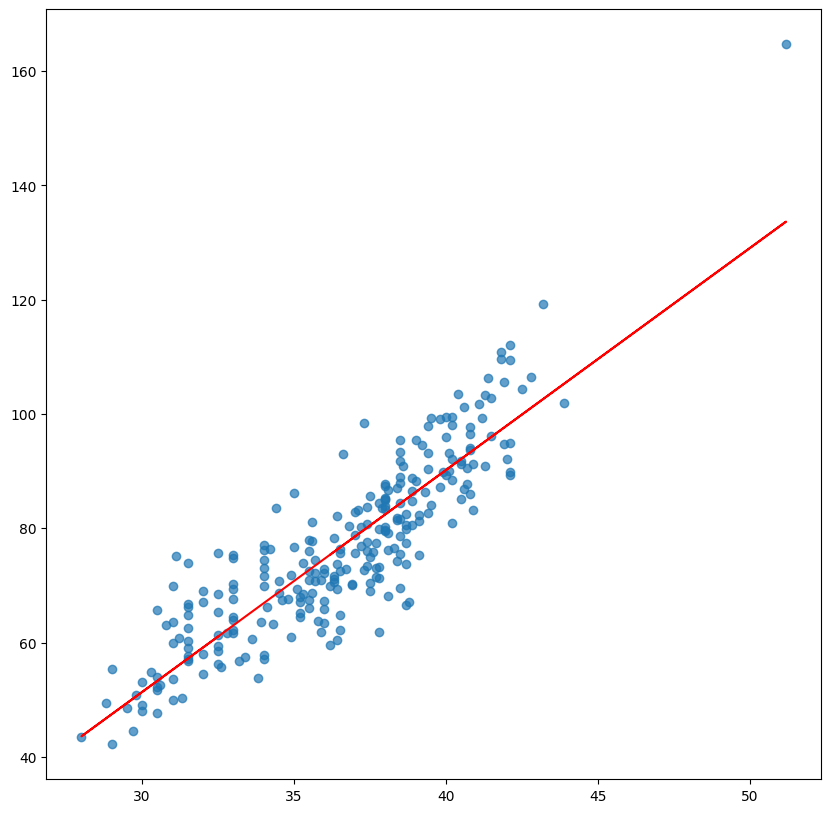

In [30]:
y_head = linear_reg.predict(x) # предсказание значений у

plt.figure(figsize=(10,10)) # создание нового окна для графика
plt.scatter(x,y, alpha=0.7)  # создание рассеянного графика
plt.plot(x,y_head, color="red") # добавление линии, представляющей предсказанные значения y_head, в красном цвете.
plt.show() #отображение графика

In [31]:
print(y.shape, y_head.shape) #вывод размеров массива

(261, 1) (261, 1)


In [32]:
# Вычисление коэффициента детерминации (R²)
from sklearn.metrics import r2_score

print("r_square score: ", r2_score(y, y_head))

r_square score:  0.7765159397524546


In [33]:
x1 = df.loc[:, ["Neck", "Chest", "Abdomen"]] # создание датафрейма с колонками Neck, Chest, Abdomen
y1 = df["Weight"].values.reshape(-1,1) # преобразование "charges" в массив

In [34]:
multiple_linear_regression = LinearRegression() # создание экземпляра модели множественной линейной регресси
multiple_linear_regression.fit(x1,y1) # обучение модели

LinearRegression()

In [ ]:
# y = b0 + b1*x1 + b2*x2 + ... bn*xn
b0 = multiple_linear_regression.intercept_ # Получает свободный член уравнения регрессии
b1,b2,b3 = zip(*multiple_linear_regression.coef_)
print("b1:", b1, "b2:", b2, "b3:", b3) # Выводит значения коэффициентов
print("b0:", multiple_linear_regression.intercept_) # Выводит свободный член
print("b1, b2:", multiple_linear_regression.coef_) # Выводит все коэффициенты регрессии
print("Multiple Linear Regression Formula:", "y = {0} + {1}*x1 + {2}*x2 + {3}*x3".format(b0,b1,b2,b3)) # Пытается создать строку с формулой

b1: (np.float64(1.1044826071776053),) b2: (np.float64(0.3779725059540019),) b3: (np.float64(0.5121028077700441),)
b0: [-45.27490603]
b1, b2: [[1.10448261 0.37797251 0.51210281]]
Multiple Linear Regression Formula: y = [-45.27490603] + (np.float64(1.1044826071776053),)*x1 + (np.float64(0.3779725059540019),)*x2 + (np.float64(0.5121028077700441),)*x3


Neck: 28.0 - 51.2
Chest: 43.0 - 136.2
Abdomen: 58.0 - 148.1


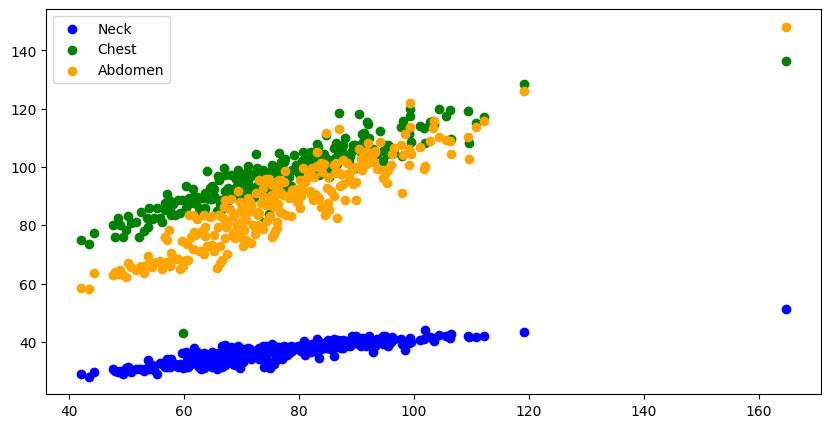

In [ ]:
print("Neck:", min(x1["Neck"]),"-", max(x1["Neck"])) # Выводит минимальное и максимальное значение колонки "Neck"
print("Chest:", min(x1["Chest"]),"-", max(x1["Chest"])) # Выводит минимальное и максимальное значение колонки "Chest"
print("Abdomen:", min(x1["Abdomen"]), "-", max(x1["Abdomen"])) # Выводит минимальное и максимальное значение колонки "Abdomen"
plt.figure(figsize=(10,5)) # Создает график размером 10x5 дюймов
plt.scatter(df["Weight"], df.Neck, color="blue", label="Neck") # Точечный график: Weight по X, Neck по Y (синие точки)
plt.scatter(df["Weight"], df["Chest"], color="green", label="Chest") # Точечный график: Weight по X, Chest по Y (зеленые точки)
plt.scatter(df["Weight"], df["Abdomen"], color="orange", label="Abdomen") # Точечный график: Weight по X, Abdomen по Y (оранжевые точки)
plt.legend() # Показывает легенду с подписями данных
plt.show() # Отображает график

In [ ]:
print("Values= np.array( [[6,280,90]])) Prediction =",
      multiple_linear_regression.predict(np.array( [[6,280,90]]))) # Выводим текст и результат предсказания для конкретных значений

print("Values= np.array( [[8,300,100]])) Prediction =",
      multiple_linear_regression.predict(np.array( [[8,300,100]]))) # Аналогично для других значений:

print("Values= np.array( [[10,350,130]])) Prediction =",
      multiple_linear_regression.predict(np.array( [[10,350,130]]))) # Аналогично для других значений:

Values= np.array( [[6,280,90]])) Prediction = [[113.27354398]]
Values= np.array( [[8,300,100]])) Prediction = [[128.16298739]]
Values= np.array( [[10,350,130]])) Prediction = [[164.63366214]]


In [ ]:
x1.head() # Выводит первые 5 строк DataFrame x1

,Neck,Chest,Abdomen
0,36.2,93.1,85.2
1,38.5,93.6,83.0
2,34.0,95.8,87.9
3,37.4,101.8,86.4
4,34.4,97.3,100.0


In [ ]:
y1_head = multiple_linear_regression.predict(x1) # Получаем предсказания модели для всех данных из x1
y1_head[:5] # Выводим первые 5 предсказанных значений

array([[73.52776388],
       [75.13043395],
       [73.50110549],
       [78.75602718],
       [80.70630126]])

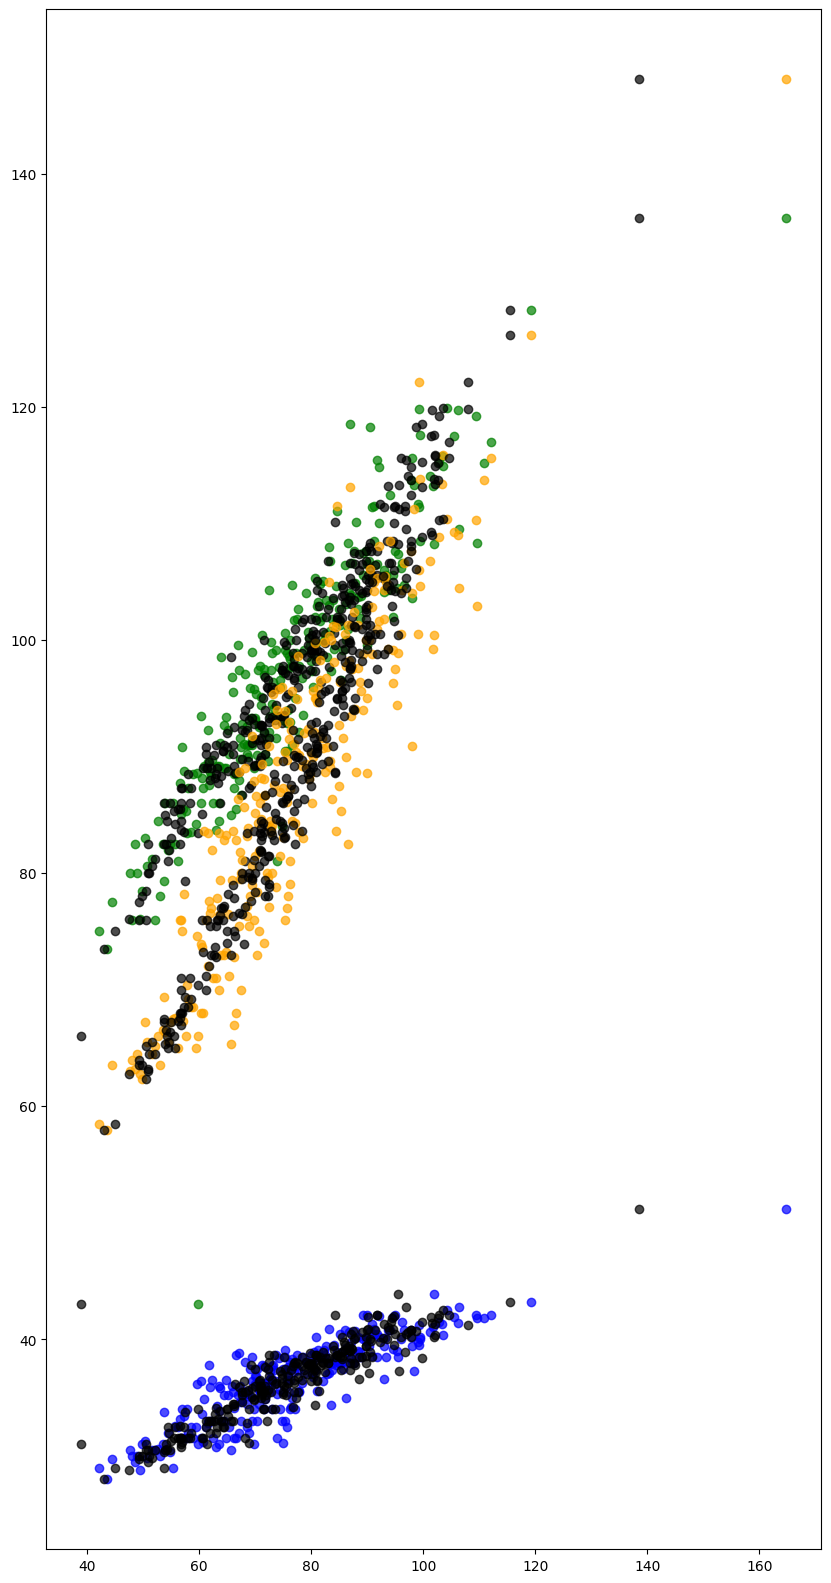

In [ ]:
plt.figure(figsize=(10,20)) # Создает график размером 10x20 дюймов

plt.scatter(y, x1.iloc[:,0], color="blue", alpha=0.7) # Age
plt.scatter(y1_head, x1.iloc[:,0], color="black", alpha=0.7)

plt.scatter(y, x1.iloc[:,1], color="green", alpha=0.7) # Glucose
plt.scatter(y1_head, x1.iloc[:,1], color="black", alpha=0.7)

plt.scatter(y, x1.iloc[:,2],color="orange", alpha=0.7) # Insulin
plt.scatter(y1_head, x1.iloc[:,2], color="black", alpha=0.7)
plt.show() # Показывает все графики на одном изображении

In [ ]:
print("r_square score: ", r2_score(y,y1_head)) # Вычисляет и выводит коэффициент детерминации R² между фактическими значениями (y) и предсказанными (y1_head)

r_square score:  0.8791514246747381


**Polynomial Regression (PR)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # Импорт класса для создания полиномиальных признаков

polynomial_regression = PolynomialFeatures(degree=2) # Создание объекта для преобразования в полином 2-й степени

x = df["Neck"].values.reshape(-1,1) # Подготовка признака: преобразование столбца "bmi" в 2D массив
x_ploynominal = polynomial_regression.fit_transform(x) # Преобразование признака x в полиномиальные

linear_regression_poly = LinearRegression() # Создание модели линейной регрессии
linear_regression_poly.fit(x_ploynominal, y) # Обучение модели на полиномиальных признаках

LinearRegression()

In [ ]:
print("x:\n", x[:5], "\ny:\n",y[:5]) # Выводит заголовок "x:" и первые 5 элементов массива x

x:
 [[36.2]
 [38.5]
 [34. ]
 [37.4]
 [34.4]] 
y:
 [[69.97]
 [78.59]
 [69.85]
 [83.8 ]
 [83.58]]


In [ ]:
y_head_poly = linear_regression_poly.predict(x_ploynominal) # Используем обученную полиномиальную модель для предсказания значений y на основе полиномиальных признаков
y_head_poly[:5] # Выводим первые 5 предсказанных значений для проверки

array([[73.62140584],
       [83.15424791],
       [65.90291974],
       [78.4084113 ],
       [67.20447106]])

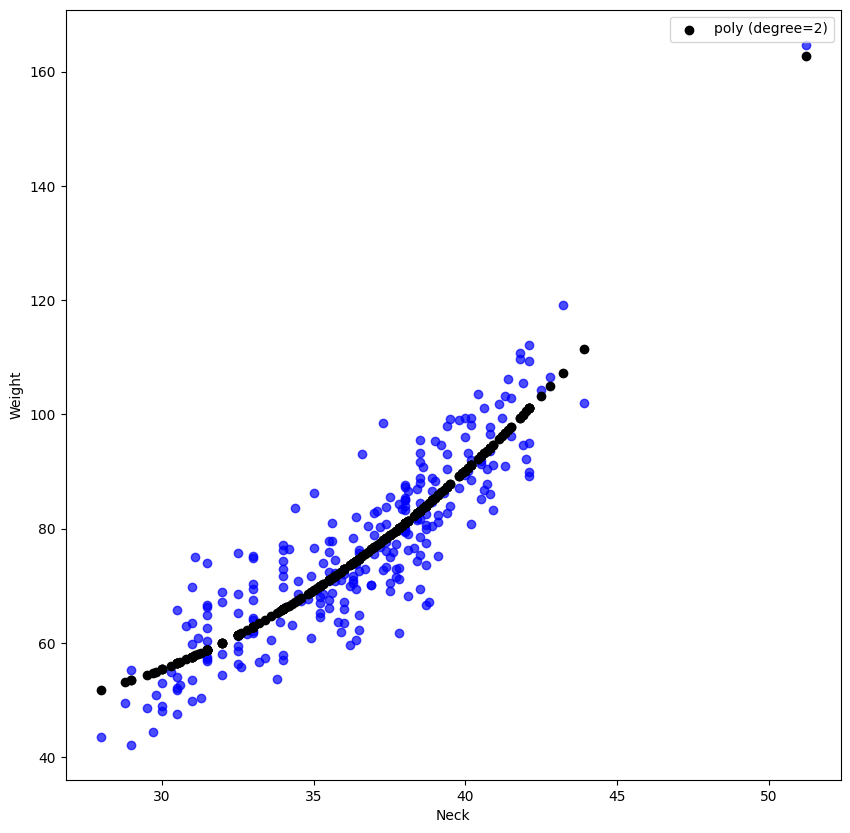

In [ ]:
plt.figure(figsize=(10,10)) # Создает график размером 10x10 дюймов
plt.scatter(x, y, color="blue", alpha=0.7)
plt.scatter(x, y_head_poly, label="poly (degree=2)", color="black")
plt.xlabel("Neck") # Подписывает ось X как "bmi"
plt.ylabel("Weight")
plt.legend() # Добавляет легенду для идентификации данных
plt.show() # Отображает график

In [ ]:
polynomial_regression = PolynomialFeatures(degree=7) # Создает объект для преобразования в полиномиальные признаки 7-й степени

x_ploynominal = polynomial_regression.fit_transform(x) # Преобразует исходный признак x в полиномиальные

linear_regression_poly = LinearRegression() # Создает модель линейной регрессии
linear_regression_poly.fit(x_ploynominal, y) # Обучает модель на полиномиальных признаках (находит коэффициенты)

y_head_poly = linear_regression_poly.predict(x_ploynominal) # Использует обученную модель для предсказания значений y

In [ ]:
polynomial_regression7 = PolynomialFeatures(degree=7) # Создает преобразователь полиномиальных признаков 7-й степени

x_ploynominal_7 = polynomial_regression7.fit_transform(x) # Преобразует данные x в полиномиальные признаки

linear_regression_poly_7 = LinearRegression() # Создает модель линейной регрессии
linear_regression_poly_7.fit(x_ploynominal_7, y) # Обучает модель на полиномиальных признаках 7-й степени

y_head_poly_7 = linear_regression_poly_7.predict(x_ploynominal_7) # Делает предсказания с помощью обученной модели

In [ ]:
polynomial_regression30 = PolynomialFeatures(degree=30) # Создает преобразователь полиномиальных признаков 30-й степени

x_ploynominal_30 = polynomial_regression30.fit_transform(x) # Преобразует данные x в полиномиальные признаки

linear_regression_poly_30 = LinearRegression() # Создает модель линейной регрессии
linear_regression_poly_30.fit(x_ploynominal_30, y) # Обучает модель на полиномиальных признаках 30-й степени

y_head_poly_30 = linear_regression_poly_30.predict(x_ploynominal_30) # Делает предсказания с помощью обученной модели

In [ ]:
print("r_square score for degree=2: ", r2_score(y, y_head_poly)) # Выводит R² score для полиномиальной регрессии 2-й степени
print("r_square score for degree=7: ", r2_score(y, y_head_poly_7)) # Выводит R² score для полиномиальной регрессии 7-й степени
print("r_square score for degree=30: ", r2_score(y, y_head_poly_30)) # Выводит R² score для полиномиальной регрессии 30-й степени

r_square score for degree=2:  0.8137919520748358
r_square score for degree=7:  0.8137919520748358
r_square score for degree=30:  0.7725977730567892


**Задание 3. Выберите самостойтельно файл исходных данных. Обязательно приведите ссылку для его скачивания. Решите задачу прогнозирования с использованием различных моделей регрессии. Вычислите коэффицииенты детерминации для каждой модели регрессии, MAE, MSE, RMSE, постройте уравнение регрессии, вычислите прогнозные значения, используя тестовые данные**

Ссылку для скачивания исходного файла данных: https://www.kaggle.com/datasets/mustafa20635/fitness-exercises-using-bfp-and-bmi

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import PolynomialFeatures, StandardScaler
from sklearn.compose        import ColumnTransformer
from sklearn.pipeline       import Pipeline
from sklearn.linear_model   import LinearRegression, Ridge
from sklearn import metrics

# Подключение к Google Drive и загрузка данных
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/My Drive/BodyFat - Extended.csv") #загрузка файла
# Удаляем не нужные для работы столбцы
df = df.drop(df.columns[2], axis=1) # Original
df = df.drop(df.columns[1], axis=1) # Sex

df.head(5) # вывод 5 первых строк датафрейма

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# заменяем "?" на NaN
df.replace("?", np.nan, inplace=True)

for col in df.columns: # заполняем пропуски
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True) # для строковых (категориальных) значений заменяем на моду
    else:
        df[col].fillna(df[col].mean(), inplace=True) # для числовых — на среднее

In [ ]:
df['Age'] = df['Age'].astype(float)

In [ ]:
df.info() #вывод сводной информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  436 non-null    float64
 1   Age      436 non-null    float64
 2   Weight   436 non-null    float64
 3   Height   436 non-null    float64
 4   Neck     436 non-null    float64
 5   Chest    436 non-null    float64
 6   Abdomen  436 non-null    float64
 7   Hip      436 non-null    float64
 8   Thigh    436 non-null    float64
 9   Knee     436 non-null    float64
 10  Ankle    436 non-null    float64
 11  Biceps   436 non-null    float64
 12  Forearm  436 non-null    float64
 13  Wrist    436 non-null    float64
dtypes: float64(14)
memory usage: 47.8 KB


In [ ]:
# Анализ структуры данных
print(df.shape) # Размер датасета
print(df.head())  # Первые 5 строк

# Определение целевой переменной и признаков
target = 'Weight' # Целевая переменная - Weight
num_cols = [c for c in df.columns if c != target] # Все колонки кроме целевой

# заполняем пропуски средним
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',  StandardScaler())          # масштабируем
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols)
])

# Разделение на признаки и целевую переменную
X = df[num_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False)  # Разделение на обучающую и тестовую выборки (80/20)

# Создание линейной модели
lin_model = Pipeline([
    ('prep',  preprocessor),
    ('model', LinearRegression())
])

# Создание полиномиальной модели (степень 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_model = Pipeline([
    ('prep',  preprocessor),
    ('poly',  poly_features),
    ('model', LinearRegression())
])

# Создание Ridge-регрессии
ridge_model = Pipeline([
    ('prep',  preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Словарь всех моделей для удобства
models = {'Linear' : lin_model,
          'Polynomial': poly_model,
          'Ridge'  : ridge_model}

# Обучение всех моделей
for mdl in models.values():
    mdl.fit(X_train, y_train)

(436, 14)
   BodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     12.3  23.0   69.97    1.72  36.2   93.1     85.2   94.5   59.0  37.3   
1      6.1  22.0   78.59    1.84  38.5   93.6     83.0   98.7   58.7  37.3   
2     25.3  22.0   69.85    1.68  34.0   95.8     87.9   99.2   59.6  38.9   
3     10.4  26.0   83.80    1.84  37.4  101.8     86.4  101.2   60.1  37.3   
4     28.7  24.0   83.58    1.81  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


In [ ]:
def metrics_dict(model): # Функция для вычисления метрик качества модели
    y_pred = model.predict(X_test)  # Получаем предсказания на тестовых данных
    return {'R2'  : metrics.r2_score(y_test, y_pred), # Коэффициент детерминации (чем ближе к 1, тем лучше)
            'MAE' : metrics.mean_absolute_error(y_test, y_pred),  # Средняя абсолютная ошибка
            'MSE' : metrics.mean_squared_error(y_test, y_pred),  # Средняя квадратичная ошибка
            'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))} # Корень из MSE

results = pd.DataFrame({k: metrics_dict(v) for k,v in models.items()}).T # Создаем DataFrame с метриками для всех моделей
print(results) # Вывод результатов сравнения моделей

                  R2       MAE       MSE      RMSE
Linear      0.878643  2.051332  8.888539  2.981365
Polynomial  0.904528  1.669071  6.992604  2.644353
Ridge       0.878681  2.048809  8.885766  2.980900


In [ ]:
# Линейная (коэффициенты + intercept)
lin_coef = lin_model.named_steps['model'].coef_ # Получаем коэффициенты линейной модели
lin_inter = lin_model.named_steps['model'].intercept_ # Получаем свободный член линейной модели
feat_names = lin_model.named_steps['prep'].get_feature_names_out() # Получаем названия признаков после предобработки

eq = f"Weight = {lin_inter:.3f}" # Начинаем формировать уравнение регрессии
for name, c in zip(feat_names, lin_coef): # Добавляем в уравнение каждый признак с его коэффициентом
    eq += f" + ({c:.3f} * {name})"
print(eq) # Выводим итоговое уравнение линейной регрессии

Weight = 75.556 + (-0.265 * num__BodyFat) + (-0.987 * num__Age) + (1.549 * num__Height) + (2.172 * num__Neck) + (2.429 * num__Chest) + (3.927 * num__Abdomen) + (3.952 * num__Hip) + (0.636 * num__Thigh) + (1.323 * num__Knee) + (0.615 * num__Ankle) + (1.128 * num__Biceps) + (-0.184 * num__Forearm) + (0.420 * num__Wrist)


In [ ]:
pred_df = pd.DataFrame({ # Создаем DataFrame для сравнения предсказаний разных моделей
    'Actual': y_test.values, # Фактические значения из тестовой выборки
    'Linear':      lin_model.predict(X_test), # Предсказания линейной модели
    'Polynomial':  poly_model.predict(X_test), # Предсказания полиномиальной модели
    'Ridge':       ridge_model.predict(X_test) # Предсказания Ridge-модели
})
print(pred_df.head(10)) # Выводим первые 10 строк для визуального сравнения предсказаний

    Actual     Linear  Polynomial      Ridge
0  54.8856  53.953148   54.735535  53.983072
1  60.7824  62.711428   62.217164  62.733939
2  49.8960  48.115703   49.757785  48.130472
3  49.8960  51.242092   53.550351  51.262620
4  59.8752  60.560551   61.904660  60.571590
5  52.6176  52.499813   53.604887  52.517595
6  64.4112  66.892101   65.297693  66.914251
7  74.8440  76.824945   75.560493  76.643473
8  69.4008  71.877154   71.219606  71.794413
9  77.1120  78.944319   74.683766  78.992508
